In [259]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [260]:
xls = pd.ExcelFile('Adops & Data Scientist Sample Data.xlsx')
df = pd.read_excel(xls, 'Q2 Regression', header = None)
df.head(10)

,0,1,2
0,0.490142,-0.179654,11.536508
1,-1.414793,-1.225605,11.828531
2,0.943066,4.506148,-3.235349
3,3.569090,5.068347,-23.891922
4,-1.702460,6.905051,-22.125437
5,-1.702411,1.126177,1.911102
6,3.737638,0.720181,11.290391
7,1.302304,4.764130,-4.919764
8,-2.408423,0.408035,3.012319
9,0.627680,6.307573,-8.661391


In [261]:
df.columns = ['A','B','C']
df.head(10)

,A,B,C
0,0.490142,-0.179654,11.536508
1,-1.414793,-1.225605,11.828531
2,0.943066,4.506148,-3.235349
3,3.569090,5.068347,-23.891922
4,-1.702460,6.905051,-22.125437
5,-1.702411,1.126177,1.911102
6,3.737638,0.720181,11.290391
7,1.302304,4.764130,-4.919764
8,-2.408423,0.408035,3.012319
9,0.627680,6.307573,-8.661391


In [262]:
X = df[['A','B']].values
Y = df['C'].values
Y

array([ 1.15365083e+01,  1.18285306e+01, -3.23534931e+00, -2.38919224e+01,
       -2.21254371e+01,  1.91110178e+00,  1.12903913e+01, -4.91976400e+00,
        3.01231897e+00, -8.66139082e+00, -2.42944440e+01, -1.62927063e+00,
       -4.20987858e+00, -9.97072376e+01,  3.35824190e+01, -3.08501835e+01,
       -1.76247407e+01, -5.91515312e+00,  8.38130614e-01, -8.36689858e+01,
        1.00005619e+01,  1.85743726e+01, -1.12960826e+01,  2.89365769e+01,
        3.61865331e+00, -1.19939467e+01, -7.00278264e+01,  2.03340776e+00,
       -1.59796176e+01, -2.91228900e-01,  4.80712037e+00,  1.58728799e+01,
       -4.86973297e+00, -4.34299661e+01, -6.04743678e+00, -5.65892283e+01,
        1.56334432e+01, -4.63911103e+01,  3.13987205e+01,  1.52800092e+00,
        7.34861312e+00, -9.15795121e+00,  5.40918573e+00,  1.43321512e+01,
        2.23945900e+01, -2.85927776e+01, -1.15320458e+01,  2.40597494e+01,
        1.65393318e+01, -7.80454825e+01,  1.67623117e+01, -1.96626517e+01,
       -2.31750346e+01,  

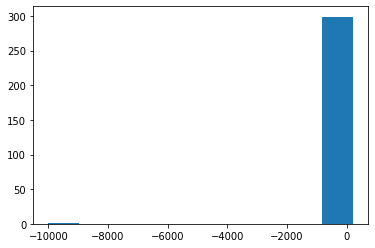

In [263]:
#Plot histogram of Y
plt.hist(Y, bins = 10)
plt.show()
#There seems some outliars according to this histogram.

In [264]:
#See the description of C columns in the dataframe
df['C'].describe()
#Maximum value seems reasonable, but minimum value seems not right

count     300.000000
mean      -41.567544
std       581.196205
min     -9999.000000
25%       -23.354257
50%        -3.087428
75%        16.303241
max       202.022916
Name: C, dtype: float64

In [265]:
#Let's find outliars!
for i in Y:
    if i < -500:
        print(i)

-9999.0


In [266]:
#Since we found one big outliar, I would choose to remove the outliar
for i in range(len(Y)):
    if Y[i] < -500:
        print(i)
#The index of the outliar is 200.
df['C'][200]

200


-9999.0

In [267]:
#Delete the 201th row in the dataframe
df.drop(index=200, inplace=True)
df.describe()

,A,B,C
count,299.000000,299.000000,299.000000
mean,2.290746,2.027161,-8.265095
std,5.686311,2.993469,71.344976
min,-8.859235,-2.891623,-315.397489
25%,-1.946911,-0.586919,-23.066717
50%,0.447417,1.944203,-2.939506
75%,7.027326,4.706529,16.314942
max,20.558194,6.997177,202.022916


In [268]:
#Build X and Y from the dataframe
X = df[['A','B']].values
Y = df['C'].values

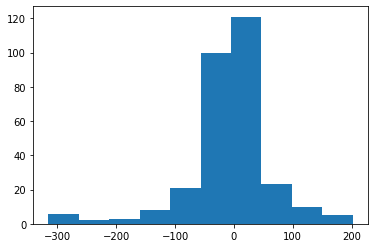

In [269]:
#Plot histogram of Y
plt.hist(Y, bins = 10)
plt.show()
#There seems some outliars according to this histogram.

In [270]:
#def normalize(column):
#    upper = column.max()
#    lower = column.min()
#    y = (column - lower)/(upper-lower)
#    return y
#Y = normalize(Y)

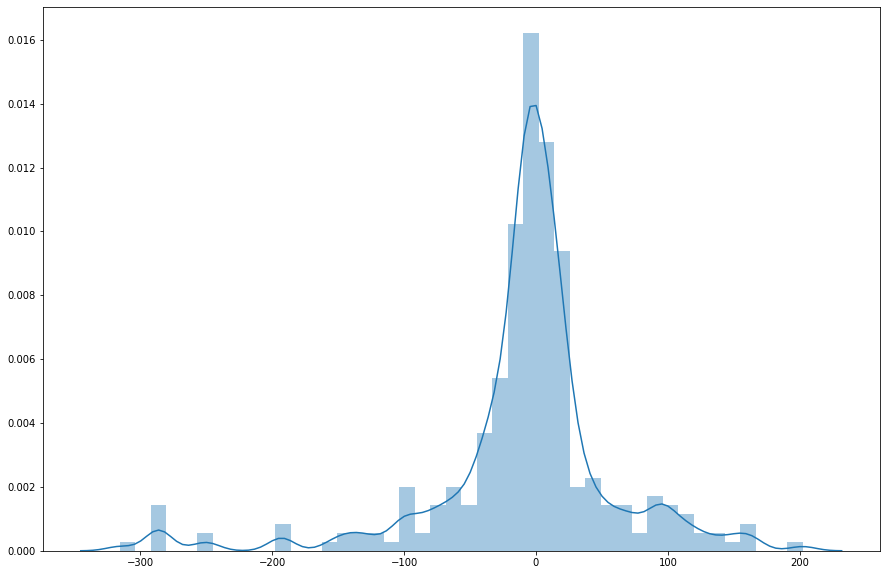

In [271]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(Y)

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [273]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [274]:
y_pred = regressor.predict(X_test)

In [275]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head(25)

,Actual,Predicted
0,9.414463,0.534509
1,-42.147006,-58.114473
2,-4.209879,-45.818129
3,139.941708,13.819661
4,-48.157494,-36.556908
5,-46.865095,-75.242772
6,-289.174093,-90.248610
7,87.173197,26.155451
8,-23.175035,-34.490288
9,4.600521,-0.959571


In [276]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [277]:
label = ['A^0*B^0','A*1','A*A*1','A*A*A*1','A*A*A*A*1','1*B','A*B','A*A*B','A*A*A*B','1*B*B','A*B*B','A*A*B*B',
          '1*B*B*B','A*B*B*B','1*B*B*B*B']
coeff_df = pd.DataFrame(pol_reg.coef_,label, columns=['Coefficient'])  
coeff_df

,Coefficient
A^0*B^0,0.000000e+00
A*1,2.000000e+00
A*A*1,-2.999999e+00
A*A*A*1,-4.578326e-08
A*A*A*A*1,2.191159e-08
1*B,-9.661832e-08
A*B,9.454252e-09
A*A*B,-4.000000e-01
A*A*A*B,3.026744e-08
1*B*B,-1.398680e-07


In [278]:
y_pred = pol_reg.predict(X_poly_test)

In [279]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head(25)

,Actual,Predicted
0,9.414463,9.414463
1,-42.147006,-42.147014
2,-4.209879,-4.209869
3,139.941708,139.941698
4,-48.157494,-48.157497
5,-46.865095,-46.865098
6,-289.174093,-289.174099
7,87.173197,87.173197
8,-23.175035,-23.175020
9,4.600521,4.600509


In [280]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.217946483809098e-06
Mean Squared Error: 1.1893926633428908e-10
Root Mean Squared Error: 1.0905928036361191e-05


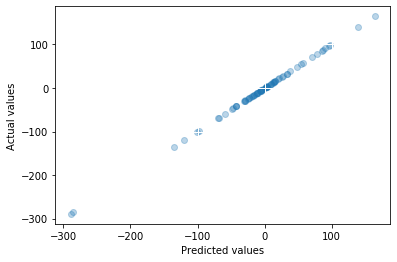

In [281]:
plt.scatter(y_pred, y_test, alpha=0.3)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.grid(linewidth="1", color="white")
plt.show()